DAY 01 - Feb 25, 2017

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

import os

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = [15, 6] #default [6, 4]

# Titanic: Machine Learning from Disaster

**Goal:** For each passenger in the test set, you must predict whether or not they survived the sinking ( 0 for deceased, 1 for survived ).
https://www.kaggle.com/c/titanic

In [4]:
input_dir = "./data/"
train_file = os.path.join(input_dir, "train.csv")
test_file = os.path.join(input_dir, "test.csv")

In [5]:
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

# Data exploration 
What is in the data?

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.shape

(891, 12)

How many different levels are in each feature?

In [8]:
features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

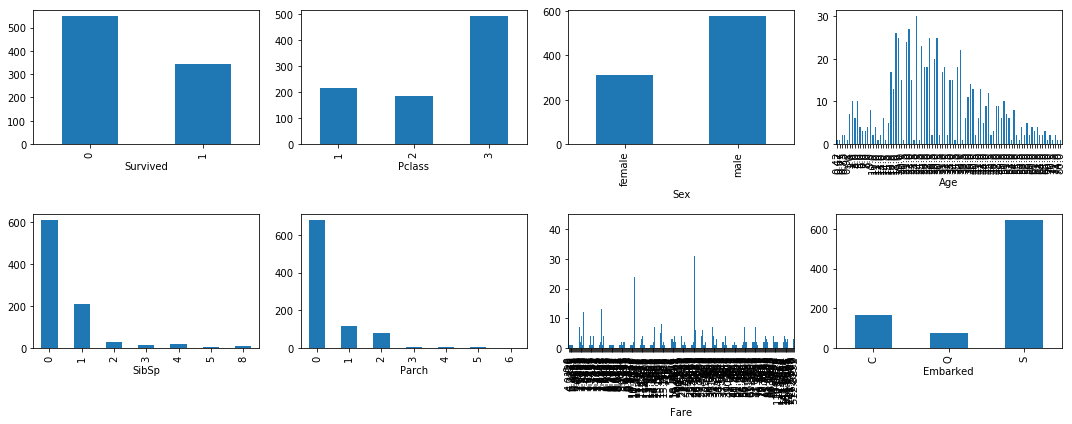

In [9]:
fig, axs = plt.subplots(2,4)

row = -1
for i,f in enumerate(features):
    col = i % 4
    if col==0: row+=1

    train.groupby(f).size().plot(kind="bar", ax=axs[row,col])
plt.tight_layout()

Let's now add some color (red for those that did not survive; blue for those that did survive)

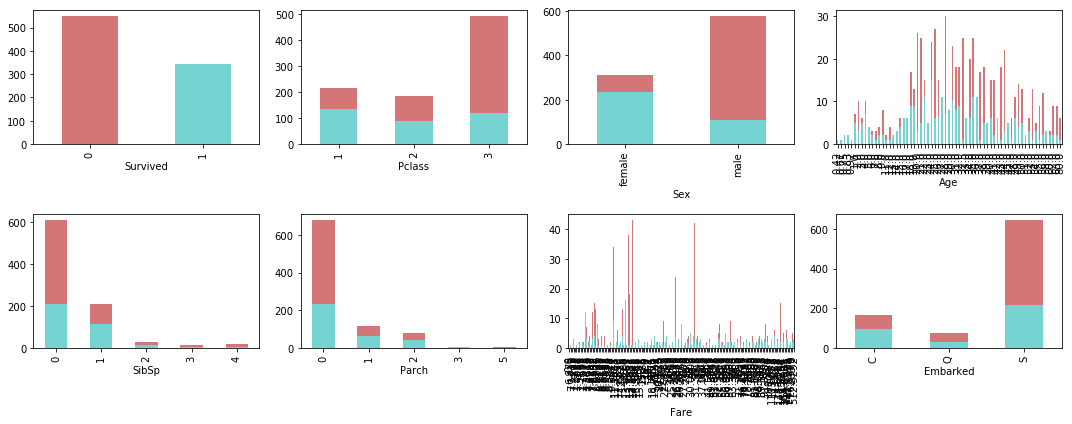

In [10]:
fig, axs = plt.subplots(2,4)

row = -1
for i,f in enumerate(features):
    col = i % 4
    if col==0: row+=1

    train.groupby(f).size().plot(kind='bar', color='#d47577', ax=axs[row,col])
    if f=='Survived':
        s = train.groupby(f).size()
        s[0]=0
        s.plot(kind='bar', color='#75d4d2', ax=axs[row,col])
    else:
        train[train['Survived'] == 1].groupby(f).size().plot(kind='bar', color='#75d4d2', ax=axs[row,col])
plt.tight_layout()

- With regards to `Sex`, it looks like a greater proportion of women survived than men.
- `Embarked` refers to Port of Embarkation (C=Cherbourg; Q=Queenstown; S=Southampton) which will be a feature left out since this doesn't seem to be an ordinal variable

## Did they survived the sinking ship?

### Method

- Use logistic regression to predict survival
- map categorical variables to integers
- averages to represent missing values

From the exploratory analysis, I will use these 6 features:

In [11]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

### Data wrangling

But before these features can be used, these features need to be cleaned

In [12]:
# Is there missing values?
train[features].isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

The `Age` variable seems to be missing. To deal with this, we will replace the NA with the mode age

In [13]:
# Replace missing value
na_age = int(train.Age.mode())
na_fare = int(train.Fare.mode())
print(na_age)
print(na_fare)

train.Age.fillna(na_age, inplace=True)

24
8


In [14]:
# Map categorical variable to integer
train.Sex.replace({"male":0, "female":1}, inplace=True)

### The model

In [15]:
# Format input data
train_x = train[features].values
train_y = train.Survived.values

In [16]:
# Create linear regression object
regr = linear_model.LogisticRegression()

# Train
regr.fit(X=train_x, y=train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
# The coefficients
print('Features: \n', features)
print('Coefficients: \n', regr.coef_)

Features: 
 ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
Coefficients: 
 [[-0.96397625  2.6426827  -0.0327486  -0.32297206 -0.08925091  0.00385296]]


### The accuracy
Now that we have our model trained, how accurate is the model?

In [18]:
train_yhat = regr.predict(train_x)
accuracy = train_yhat==train_y

print("Accuracy: %0.1f%%" % (sum(accuracy)/len(train_x)*100))

Accuracy: 79.5%


### More data wrangling

In [19]:
test_x = test[features]

In [20]:
# Is there missing value?
test_x.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

In [21]:
# Replace NA
test_x.Age.fillna(na_age, inplace=True)
test_x.Fare.fillna(na_fare, inplace=True)

# Map to integer
test_x.Sex.replace({"male":0, "female":1}, inplace=True)

/Users/csiu/software/anaconda/anaconda2-4.0.0/envs/kaggle/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/csiu/software/anaconda/anaconda2-4.0.0/envs/kaggle/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### The prediction

In [22]:
test_yhat = regr.predict(test_x)

In [23]:
pd.DataFrame({"PassengerId":test.PassengerId, "Survived":test_yhat}).to_csv("survival_submission.csv", index=False)

!head survival_submission.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1
